# Movie Lense data:: Latest small data

In this exercise, I am chose **MovieLens Dataset** *(ml-latest-small)*. First I explore the given dataset by plotting the distribution, rating, and observing the different examples. In this exercise, I am showing only, a few observation which makes sense.

The data is very clean.

For Machine Learning system, I used Collaborative Filtering using SVD (Singular-value Decomposition) and KNN (k-Nearest Neighbors). The reason I started with these two approaches, is to establish the baseline for a system. I tried an attempt with Deeplearning model to train Embedding matrix, which, in principle should work better. I could not finish the Deeplearning model. 

For a model evaluation, I computed Root Mean Square Error (RMSE) and Mean Absolute Error (MAE) with 5-fold cross-validation.

Apart from a lialg library, I used a library -scikit-surprise for SVD and KNN model with k-fold, and Keras for deeplearning.

Once a model is trained, it is straightforward to get a list of recommendations for a user, I did not spend a lot of time to print the recommendation in a very nice way.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-and-understadning-the-data" data-toc-modified-id="Loading-and-understadning-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading and understadning the data</a></span></li><li><span><a href="#Distribuation-of-users'-rating,-movies'-rating-and-rating-scale" data-toc-modified-id="Distribuation-of-users'-rating,-movies'-rating-and-rating-scale-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Distribuation of users' rating, movies' rating and rating scale</a></span><ul class="toc-item"><li><span><a href="#Top-5-movies-that-User-'u'-liked" data-toc-modified-id="Top-5-movies-that-User-'u'-liked-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Top 5 movies that User 'u' liked</a></span></li></ul></li><li><span><a href="#Creating-a-Rating-matrix---(user,-movie)" data-toc-modified-id="Creating-a-Rating-matrix---(user,-movie)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Creating a Rating matrix - (user, movie)</a></span><ul class="toc-item"><li><span><a href="#Content-based-recommender-system" data-toc-modified-id="Content-based-recommender-system-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Content based recommender system</a></span></li></ul></li><li><span><a href="#Collaborative-Filter-Recommender-Systems" data-toc-modified-id="Collaborative-Filter-Recommender-Systems-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Collaborative Filter Recommender Systems</a></span><ul class="toc-item"><li><span><a href="#Using-SVD" data-toc-modified-id="Using-SVD-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Using SVD</a></span></li><li><span><a href="#Using-KNN" data-toc-modified-id="Using-KNN-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Using KNN</a></span></li></ul></li><li><span><a href="#Recommonding-the-movies-to-user-'u'" data-toc-modified-id="Recommonding-the-movies-to-user-'u'-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Recommonding the movies to user <em>'u'</em></a></span></li><li><span><a href="#Deeplearning-approach-using-Embedding---Not-Finished" data-toc-modified-id="Deeplearning-approach-using-Embedding---Not-Finished-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Deeplearning approach using Embedding-- Not Finished</a></span></li></ul></div>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and understadning the data

In [7]:
ratings = pd.read_csv('../Datasets/ml-latest-small/ratings.csv')
movies  = pd.read_csv('../Datasets/ml-latest-small/movies.csv')
tags    = pd.read_csv('../Datasets/ml-latest-small/tags.csv')
links   = pd.read_csv('../Datasets/ml-latest-small/links.csv')

In [3]:
display(ratings.head())
display(movies.head())
display(tags.head())

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [9]:
nUsers  = len(ratings.userId.unique())
nMovies = len(movies.movieId.unique())
print('Number of Users: '+ str(nUsers) + '| Number of Movies: ' + str(nMovies))
print('Number of total ratings : ',ratings.shape[0])
print('Rating scale : ' , np.sort(ratings.rating.unique()))

Number of Users: 610| Number of Movies: 9742
Number of total ratings :  100836
Rating scale :  [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


In [5]:
Uid, Frq = np.unique(ratings.userId, return_counts=True)

## Distribuation of users' rating, movies' rating and rating scale

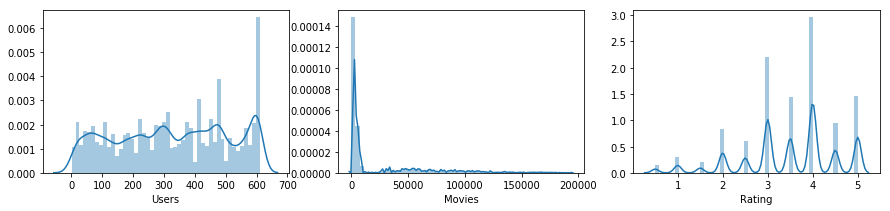

In [7]:
plt.figure(figsize=(15,3))
plt.subplot(131)
sns.distplot(np.array(ratings.userId))
plt.xlabel('Users')
plt.subplot(132)
sns.distplot(np.array(ratings.movieId))
plt.xlabel('Movies')
plt.subplot(133)
sns.distplot(np.array(ratings.rating))
plt.xlabel('Rating')
plt.show()

### Top 5 movies that User 'u' liked

In [80]:
u = 100
ru = ratings[ratings.userId ==u].sort_values('rating',ascending = False)
movies[movies.movieId.isin(list(ru.movieId)[:5])]

,movieId,title,genres
839,1101,Top Gun (1986),Action|Romance
1435,1958,Terms of Endearment (1983),Comedy|Drama
1823,2423,Christmas Vacation (National Lampoon's Christm...,Comedy
3022,4041,"Officer and a Gentleman, An (1982)",Drama|Romance
3986,5620,Sweet Home Alabama (2002),Comedy|Romance


The distribuation of of users' rating shows a few users have rated more number of movies, while movies' rating shows a few movies are rated quite a lot than others. The distribuation of ratings shows that in the data, moviews with lowest rating are quite a few. 

## Creating a Rating matrix - (user, movie)

Creating a matrix R, where each uses is on row and all the movies are on the coulumn.

In [8]:
R = ratings.pivot(index = 'userId', columns ='movieId', values = 'rating').fillna(0)
Rmat = np.array(R)
R.shape

(610, 9724)

**Sparsity of rating matrix**

In [9]:
Density  = np.sum(Rmat>0)/(Rmat.shape[0]*Rmat.shape[1])
Sparsity = 1 - Density
print('Density  of R: ',Density)
print('Sparsity of R: ',Sparsity)

Density  of R:  0.016999683055613623
Sparsity of R:  0.9830003169443864


# Types of recommender systems

### Content based recommender system
In this kind of system, user get recommendations to use the items which are similar to the items user uses. This kind of recommender system is easy to built, by computing the similarity between items (movies in this case). Given the genre of movies, a similar movies can be recommended to a user

I will explore Collaborative filter approach, which is explained below


## Collaborative Filter Recommender Systems

Collabrorative filtering (CL) approach is very interesting, in the practical sense. In my opinion, this is how we usually explore new things.

The assumption of CL approach is that if two people have same opinion on an issue, they are likely to have similar opinion on another issue too. In other words, in person A and B, both liked a movie, then other movies liked by person B can be recommended to person A.   

For collaborative filtering, I am using a SVD and KNN approach from the surprise package. 
The CL transforms user-item interactions into latent space, and reconstructs the user-item matrix to predict the ratings of missing movie.

###  Using SVD

In [10]:
from scipy.sparse.linalg import svds

In [11]:
Umean = np.mean(Rmat,axis=1)
Rmean = Rmat - Umean[:,None]

**SVD decomposition**

In [12]:
U, S, Vt = svds(Rmean, k = 100)
S = np.diag(S)

 **Estimation of matrix**

In [13]:
Rest = np.dot(np.dot(U, S), Vt) + Umean[:,None]

**RMSE and MAE of estimated matrix, only for non-zero values of original data**

In [21]:
RMSE = np.sqrt(np.mean((Rmat[Rmat>0] - Rest[Rmat>0])**2))
MAE = np.mean(abs(Rmat[Rmat>0] - Rest[Rmat>0]))
print('RMSE with SVD : ',RMSE)
print('MAE  with SVD : ',MAE)

RMSE with SVD :  1.5815694472113941
MAE  with SVD :  1.0775320646626771


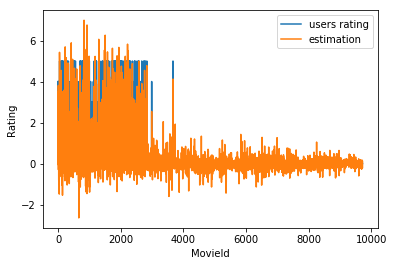

In [15]:
plt.plot(Rmat[0,:], label='user''s rating')
plt.plot(Rest[0,:], label='estimation')
plt.xlabel('MovieId')
plt.ylabel('Rating')
plt.legend()
plt.show()

**SVD seems to estimate the rating quite close to original, though for proper evalaution, we need to split the data into training and tesing, foe which we use surprise library**

In [16]:
from surprise import Reader, Dataset, SVD, evaluate

In [18]:
reader = Reader()

mlData = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Split the dataset for 5-fold evaluation
mlData.split(n_folds=5)

In [29]:
#SVD algorithm.
svd = SVD(n_factors=100, n_epochs=20)

# Compute the RMSE of the SVD algorithm.
svdResults = evaluate(svd, mlData, measures=['RMSE','MAE'])

/home/nikesh/anaconda3/lib/python3.7/site-packages/surprise/evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
/home/nikesh/anaconda3/lib/python3.7/site-packages/surprise/dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 0.8718
MAE:  0.6707
------------
Fold 2
RMSE: 0.8686
MAE:  0.6680
------------
Fold 3
RMSE: 0.8814
MAE:  0.6775
------------
Fold 4
RMSE: 0.8787
MAE:  0.6751
------------
Fold 5
RMSE: 0.8712
MAE:  0.6694
------------
------------
Mean RMSE: 0.8744
Mean MAE : 0.6721
------------
------------


### Using KNN

In [24]:
from surprise import KNNBasic

In [33]:
knn = KNNBasic(k=20)
knnResults = evaluate(knn, mlData, measures=['RMSE','MAE'])

/home/nikesh/anaconda3/lib/python3.7/site-packages/surprise/evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
/home/nikesh/anaconda3/lib/python3.7/site-packages/surprise/dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE, MAE of algorithm KNNBasic.

------------
Fold 1
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9371
MAE:  0.7172
------------
Fold 2
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9333
MAE:  0.7123
------------
Fold 3
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9448
MAE:  0.7232
------------
Fold 4
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9416
MAE:  0.7190
------------
Fold 5
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9425
MAE:  0.7214
------------
------------
Mean RMSE: 0.9399
Mean MAE : 0.7186
------------
------------


In [41]:
RMSE = [np.mean(svdResults['rmse']),np.mean(knnResults['rmse'])]
MAE = [np.mean(svdResults['mae']),np.mean(knnResults['mae'])]

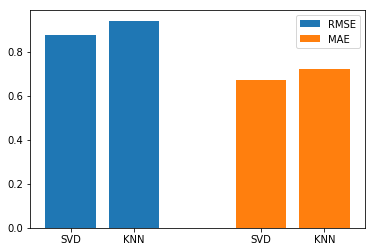

In [48]:
plt.bar([1,2],RMSE,label='RMSE')
plt.bar([4,5 ],MAE,label='MAE')
plt.xticks([1,2,4,5],['SVD','KNN','SVD','KNN'])
plt.legend()
plt.show()

**It can be observed that SVD perform better than KNN.**

## Recommonding the movies to user *'u'*

In [88]:
svd.test([(582, 85414, 2.5)])

[Prediction(uid=582, iid=85414, r_ui=2.5, est=3.475103298349108, details={'was_impossible': False})]

In [94]:
alldata = [sm[:3] for sm in mlData.raw_ratings]

In [96]:
Pred = svd.test(alldata)
Pred = pd.DataFrame(Pred)

In [98]:
Pred.drop("details", inplace=True, axis=1)
Pred.columns = ['userId', 'movieId', 'actual', 'cf_predictions']
Pred.head()

,userId,movieId,actual,cf_predictions
0,582,85414,2.5,3.475103
1,606,2593,3.5,3.393881
2,603,2973,4.0,3.623578
3,372,1286,2.0,2.804932
4,473,4979,4.5,3.965547


In [100]:
PredTable = Pred.pivot_table(index='userId', columns='movieId', values='cf_predictions').fillna(0)

In [101]:
def get_rec(userId, n, PredTable):
    ri = pd.DataFrame(PredTable.loc[userId])
    ri.columns = ["predicted_rating"]
    ri = ri.sort_values('predicted_rating', ascending=False)    
    ri = ri.head(n)
    return ri.index.tolist()

In [109]:
rec = get_rec(userId=1, n=10, PredTable=PredTable)
movies[movies.movieId.isin(rec)]

,movieId,title,genres
46,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
520,608,Fargo (1996),Comedy|Crime|Drama|Thriller
863,1136,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy
909,1208,Apocalypse Now (1979),Action|Drama|War
911,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi
914,1213,Goodfellas (1990),Crime|Drama
990,1291,Indiana Jones and the Last Crusade (1989),Action|Adventure
1883,2502,Office Space (1999),Comedy|Crime


,movieId,title,genres
46,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
520,608,Fargo (1996),Comedy|Crime|Drama|Thriller
863,1136,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy
909,1208,Apocalypse Now (1979),Action|Drama|War
911,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi
914,1213,Goodfellas (1990),Crime|Drama
990,1291,Indiana Jones and the Last Crusade (1989),Action|Adventure
1883,2502,Office Space (1999),Comedy|Crime


## Deeplearning approach using Embedding-- Not Finished

In [45]:
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from keras.layers import Embedding, Reshape, Concatenate,Dot,Multiply
from keras.models import Sequential

In [43]:
class RModel(Sequential):
    def __init__(self, nUsers, nMovies, kdimension, **kwargs):
        # user embedding matirx
        U = Sequential()
        U.add(Embedding(nUsers, kdimension, input_length=1))
        U.add(Reshape((kdimension,)))

        #movie embedding matirx
        M = Sequential()
        M.add(Embedding(nMovies, kdimension, input_length=1))
        M.add(Reshape((kdimension,)))
        
        super(RModel, self).__init__(**kwargs)
        
        print(U,M)
        
        dot_product = Multiply([U, M])
        
        self.add(dot_product)
        
    def predict(self, userId, movieId):
        return self.predict([np.array([userId]), np.array([movieId])])[0][0]  
    

In [14]:
nUsers  = len(ratings.userId.unique())
nMovies = len(movies.movieId.unique())
print('Number of Users: '+ str(nUsers) + '| Number of Movies: ' + str(nMovies))
print('Number of total ratings : ',ratings.shape[0])
print('Rating scale : ' , np.sort(ratings.rating.unique()))

Number of Users: 610| Number of Movies: 9742
Number of total ratings :  100836
Rating scale :  [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


In [46]:
model = RModel(nUsers, nMovies, kdimension=120)
model.compile(loss='mse', optimizer='adam')

<keras.engine.sequential.Sequential object at 0x7f88949b4128> <keras.engine.sequential.Sequential object at 0x7f88d464cf28>


In [47]:
Users  = np.array(ratings.userId)
Movies = np.array(ratings.movieId)
Ratings= np.array(ratings.rating)

In [50]:
Users,Movies,Ratings, 

(array([  1,   1,   1, ..., 610, 610, 610]),
 array([     1,      3,      6, ..., 168250, 168252, 170875]),
 array([4., 4., 4., ..., 5., 5., 3.]))

**Nikesh Bajaj**